### Importacion de librerias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

2024-02-09 12:12:59.049266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Input y resultados


In [2]:
### definir base de datos
input_data = pd.read_csv("Base de datos.csv")
output_data = pd.read_csv("results")
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)
print(input_data_scaled)

[[-1.51807653 -1.37946099 -1.39365106  1.43676223 -1.00701763]
 [-0.24485105 -0.09853293  1.10530946  0.3380617   1.1748539 ]
 [-0.24485105  1.18239513 -1.39365106 -0.76063883  0.08391814]
 [-1.51807653 -0.09853293 -1.39365106 -0.76063883 -1.00701763]
 [-0.24485105  1.18239513 -1.39365106  1.43676223  1.1748539 ]
 [-0.24485105  1.18239513 -0.1441708  -0.76063883 -1.00701763]
 [-0.24485105  1.18239513 -0.1441708  -0.76063883  0.08391814]
 [-0.24485105  1.18239513 -0.1441708   1.43676223 -1.00701763]
 [-0.24485105  1.18239513  1.10530946 -0.76063883  1.1748539 ]
 [-0.24485105  1.18239513  1.10530946  0.3380617  -1.00701763]
 [-0.24485105  1.18239513  1.10530946  1.43676223  0.08391814]
 [ 1.02837442 -1.37946099 -1.39365106 -0.76063883  0.08391814]
 [ 1.02837442 -1.37946099 -1.39365106 -0.76063883  1.1748539 ]
 [-1.51807653 -0.09853293 -0.1441708  -0.76063883 -1.00701763]
 [ 1.02837442 -1.37946099 -0.1441708  -0.76063883 -1.00701763]
 [-1.51807653 -0.09853293  1.10530946 -0.76063883  1.17

### Dividir datos en conjuntos de entrenamiento y prueba:


In [3]:
X_train, X_test, y_train, y_test  = train_test_split(input_data_scaled, output_data, test_size=0.1, random_state=42)


In [4]:
model = tf.keras.Sequential([
    layers.Input(shape=(input_data.shape[1],)),
    layers.Dense(20,activation="relu"),
    layers.Dense(20,activation="relu"),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer, loss = "mean_squared_error")

2024-02-09 12:13:13.423835: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Entrenamiento de la red 

In [6]:
entrenamiento = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1)

Epoch 1/1000
2/2 [==============================] - 0s 145ms/step - loss: 0.0012 - val_loss: 0.2367
Epoch 2/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.0012 - val_loss: 0.2368
Epoch 3/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.0011 - val_loss: 0.2371
Epoch 4/1000
2/2 [==============================] - 0s 73ms/step - loss: 0.0011 - val_loss: 0.2379
Epoch 5/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.0010 - val_loss: 0.2393
Epoch 6/1000
2/2 [==============================] - 0s 39ms/step - loss: 9.9736e-04 - val_loss: 0.2404
Epoch 7/1000
2/2 [==============================] - 0s 45ms/step - loss: 9.7877e-04 - val_loss: 0.2410
Epoch 8/1000
2/2 [==============================] - 0s 92ms/step - loss: 9.6127e-04 - val_loss: 0.2412
Epoch 9/1000
2/2 [==============================] - 0s 83ms/step - loss: 9.0412e-04 - val_loss: 0.2415
Epoch 10/1000
2/2 [==============================] - 0s 42ms/step - loss: 9.2561e-04 - val_l

1/1 [==============================] - 0s 21ms/step - loss: 0.1062
Error cuadrático medio en datos de prueba: 0.10617542266845703


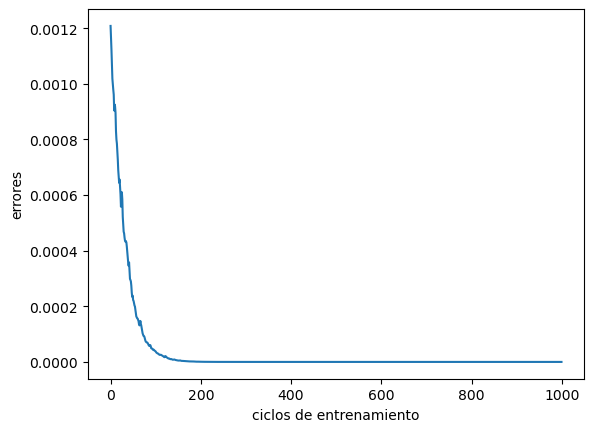

In [13]:
loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en datos de prueba: {loss}')
plt.xlabel("ciclos de entrenamiento")
plt.ylabel("errores")
plt.plot(entrenamiento.history["loss"])
plt.show()


In [10]:
print(X_test)
predictions = model.predict(X_test)
print(predictions)

[[-0.24485105  1.18239513  1.10530946 -0.76063883  1.1748539 ]
 [ 1.02837442 -1.37946099 -0.1441708   1.43676223  1.1748539 ]
 [-1.51807653 -1.37946099 -1.39365106  1.43676223 -1.00701763]]
1/1 [==============================] - 0s 17ms/step
[[1.9163885]
 [1.8144712]
 [2.318756 ]]
